In [71]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils

# DA RIVEDERE!
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_RENEWABLE_GENERATION" 
ren_energy = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
ren_energy = ren_energy.sort_values(by='ORAINI')

ren_energy.head()

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,RENEWABLE_GENERATION_GWh,ENERGY_SOURCE,LOADTIME
253779,201901010000,20190101,1,5.104,Wind,2024-10-15 15:20:44.963
253775,201901010000,20190101,1,0.000,Photovoltaic,2024-10-15 15:20:44.963
253778,201901010000,20190101,1,2.075,Hydro,2024-10-15 15:20:44.963
253777,201901010000,20190101,1,1.432,Biomass,2024-10-15 15:20:44.963
253776,201901010000,20190101,1,0.670,Geothermal,2024-10-15 15:20:44.963


In [72]:
# Filter the DataFrame for the relevant columns and rows
ren_energy = ren_energy[['RENEWABLE_GENERATION_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
ren_energy['ORAINI'] = pd.to_datetime(ren_energy['ORAINI'], format='%Y%m%d%H%M')
ren_energy.set_index('ORAINI', inplace=True)

In [73]:
# Get unique labels of the ENERGY_SOURCE
unique_energy_sources = ren_energy['ENERGY_SOURCE'].unique()

# Convert to list if needed
energy_sources_list = unique_energy_sources.tolist()

# Display the unique energy sources
print(energy_sources_list)

['Wind', 'Photovoltaic', 'Hydro', 'Biomass', 'Geothermal']


In [74]:
wind = utils.filter_and_rename_energy_source(ren_energy, 'Wind', 'WIND_GWH')

In [75]:
photovoltaic = utils.filter_and_rename_energy_source(ren_energy, 'Photovoltaic', 'PHOTOVOLTAIC_GWH')

In [76]:
hydro = utils.filter_and_rename_energy_source(ren_energy, 'Hydro', 'HYDRO_GWH')

In [77]:
biomass = utils.filter_and_rename_energy_source(ren_energy, 'Biomass', 'BIOMASS_GWH')

In [78]:
geothermal = utils.filter_and_rename_energy_source(ren_energy, 'Geothermal', 'WIND_GWH')

,WIND_GWH
ORAINI,
2019-01-01 00:00:00,0.67
2019-01-01 01:00:00,0.67
2019-01-01 02:00:00,0.67
2019-01-01 03:00:00,0.67
2019-01-01 04:00:00,0.67
...,...
2024-10-14 19:00:00,0.60
2024-10-14 20:00:00,0.60
2024-10-14 21:00:00,0.60


# Wind production

In [79]:
print("Macro-scale descriptive stats: WIND")
print(wind["WIND_GWH"].describe(),"\n")

Macro-scale descriptive stats: WIND
count    50756.000000
mean         2.369838
std          1.731654
min          0.022000
25%          0.951000
50%          1.933000
75%          3.479000
max          8.789000
Name: WIND_GWH, dtype: float64 



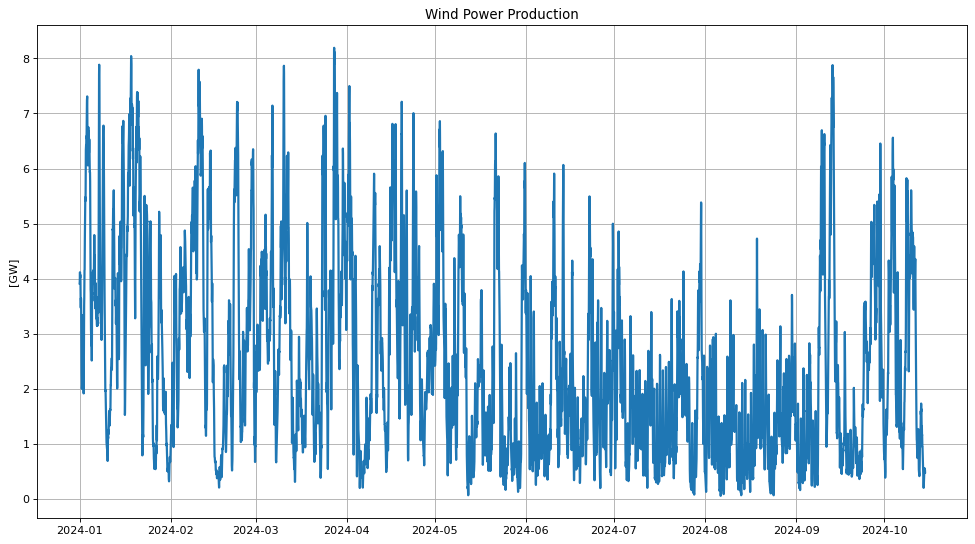

In [88]:
DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"].loc["2024"], linewidth=2) 


ax.set_title("Wind Power Production"); ax.set_ylabel("[GW]")

plt.grid(); plt.show()